In [56]:
#Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
#Reading the file
df = pd.read_csv("amazon.csv")

In [3]:
#Checking the five first rows
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
#Display a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
#Display descriptive statistics of the dataset
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [6]:
#Display the dimensions of the dataframe
df.shape

(1465, 16)

In [7]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [8]:
#Dropping null values
df = df.dropna(subset=["rating_count"])

In [9]:
#Removing the currency symbol and converting column to float
cols = ["discounted_price", "actual_price", "rating_count"]
for c in cols:
    df[c] = (
        df[c].str.replace("₹", "", regex=False)
        .str.replace(",", "", regex=False)
        .astype(float)
    )

In [10]:
#Displaying the columns
df[["discounted_price", "actual_price", "rating_count"]].head()


,discounted_price,actual_price,rating_count
0,399.0,1099.0,24269.0
1,199.0,349.0,43994.0
2,199.0,1899.0,7928.0
3,329.0,699.0,94363.0
4,154.0,399.0,16905.0


In [11]:
#Removing the percentage symbol from discount percentage
df["discount_percentage"] = df["discount_percentage"].str.replace("%", "", regex=False)

In [12]:
#Converting numerical object type to integer and float
df["discount_percentage"] = df["discount_percentage"].astype(int)

In [13]:
df["rating"] = (
    df["rating"]
    .str.replace(r"[^\d.]", "", regex=True)   # keep only digits + dot
    .replace("", np.nan)                      # convert empty strings to NaN
    .astype(float)
)

# Drop rows where rating is missing
df = df.dropna(subset=["rating"])



In [14]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   int32  
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

In [68]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,rating_count_log
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,3129.981826,5453.087743,47.672367,4.096717,18307.376881,8.303800
std,6950.548042,10884.467444,21.613905,0.289497,42766.096572,2.027792
min,39.000000,39.000000,0.000000,2.000000,2.000000,1.098612
25%,325.000000,800.000000,32.000000,4.000000,1191.500000,7.083807
50%,799.000000,1670.000000,50.000000,4.100000,5179.000000,8.552560
75%,1999.000000,4321.250000,63.000000,4.300000,17342.250000,9.760958
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000,12.964478


In [72]:
df['main_category'] = df['category'].str.split('|').str[0]


In [80]:
category_table = (
    df['main_category']
      .value_counts()
      .rename_axis('category')
      .reset_index(name='frequency')
)

category_table['percent (%)'] = (
    category_table['frequency'] / category_table['frequency'].sum() * 100
).round(2)

category_table



,category,frequency,percent (%)
0,Electronics,526,35.98
1,Computers&Accessories,451,30.85
2,Home&Kitchen,447,30.57
3,OfficeProducts,31,2.12
4,MusicalInstruments,2,0.14
5,HomeImprovement,2,0.14
6,Toys&Games,1,0.07
7,Car&Motorbike,1,0.07
8,Health&PersonalCare,1,0.07


C:\Users\appen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\appen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\appen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


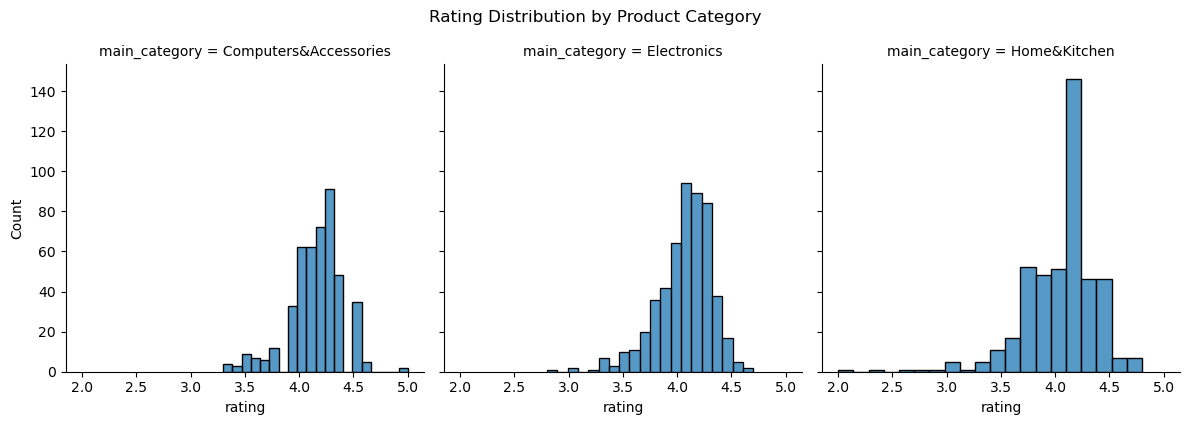

In [82]:
#Side by side histogram by category
target_categories = ["Electronics", "Computers&Accessories", "Home&Kitchen"]
df_filtered = df[df['main_category'].isin(target_categories)]

g = sns.FacetGrid(df_filtered, col="main_category", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "rating", bins=20, kde=False)

g.fig.suptitle("Rating Distribution by Product Category", y=1.05)
plt.show()

C:\Users\appen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


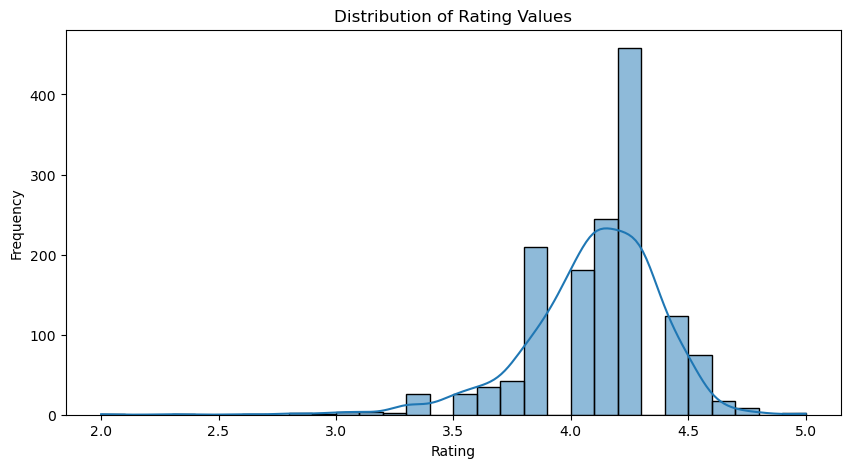

In [16]:
#Ploting Distribuition of Rating
plt.figure(figsize=(10, 5))
sns.histplot(df['rating'], kde=True, bins=30)
plt.title('Distribution of Rating Values')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

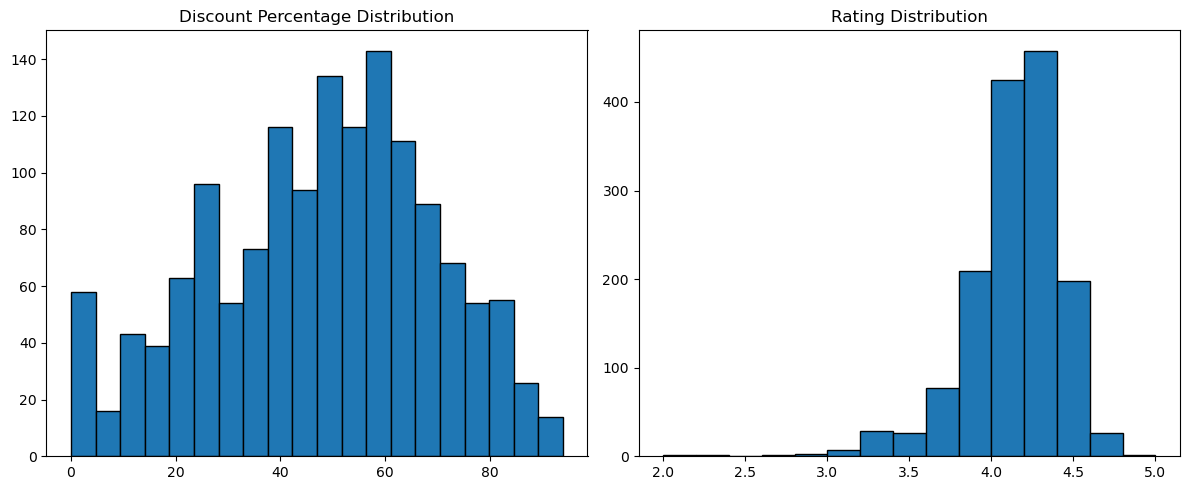

In [17]:
#Comparing distributions in one figure (discount percentage and rating)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df["discount_percentage"], bins=20, edgecolor='black')
plt.title("Discount Percentage Distribution")

plt.subplot(1,2,2)
plt.hist(df["rating"], bins=15, edgecolor='black')
plt.title("Rating Distribution")

plt.tight_layout()
plt.show()


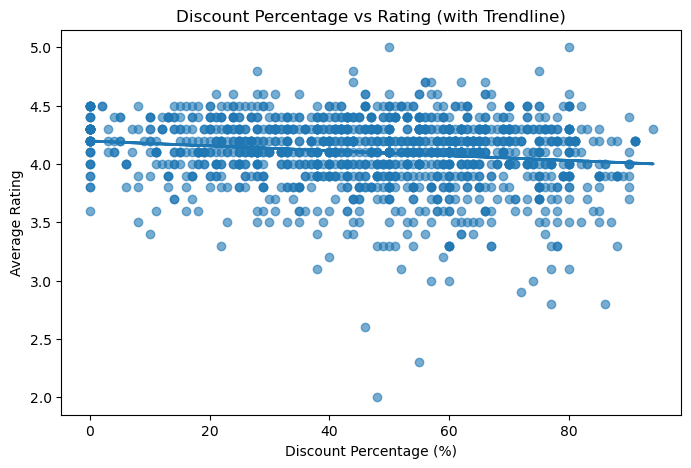

In [18]:
#Checking relationship between discount percentage and rating

plt.figure(figsize=(8,5))

# Scatter
plt.scatter(df["discount_percentage"], df["rating"], alpha=0.6)

# Linear trendline
z = np.polyfit(df["discount_percentage"], df["rating"], 1)   # degree 1 = linear
p = np.poly1d(z)
plt.plot(df["discount_percentage"], p(df["discount_percentage"]), linewidth=2)

# Labels and title
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Average Rating")
plt.title("Discount Percentage vs Rating (with Trendline)")
plt.show()

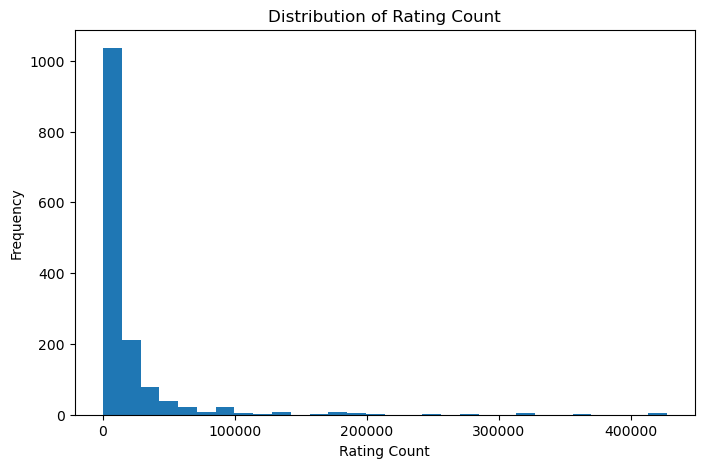

In [19]:
#Review count distribution
plt.figure(figsize=(8,5))
plt.hist(df["rating_count"], bins=30)
plt.xlabel("Rating Count")
plt.ylabel("Frequency")
plt.title("Distribution of Rating Count")
plt.show()


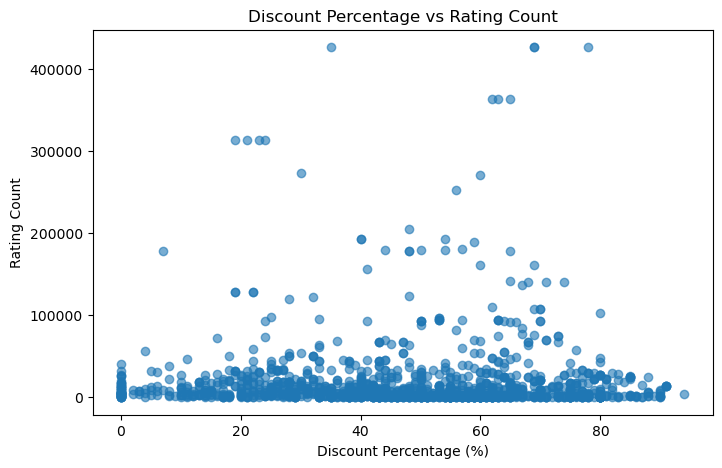

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(df["discount_percentage"], df["rating_count"], alpha=0.6)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Rating Count")
plt.title("Discount Percentage vs Rating Count")
plt.show()


In [21]:
#df.to_excel("edaamazon.xlsx")

In [22]:
#Applying a natual logarithmic transformation for rating count
df["rating_count_log"] = np.log1p(df["rating_count"])


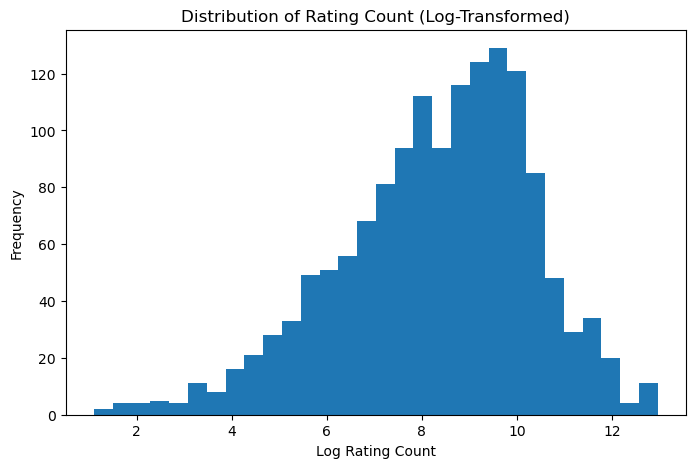

In [23]:
plt.figure(figsize=(8,5))
plt.hist(df["rating_count_log"], bins=30)
plt.xlabel("Log Rating Count")
plt.ylabel("Frequency")
plt.title("Distribution of Rating Count (Log-Transformed)")
plt.show()


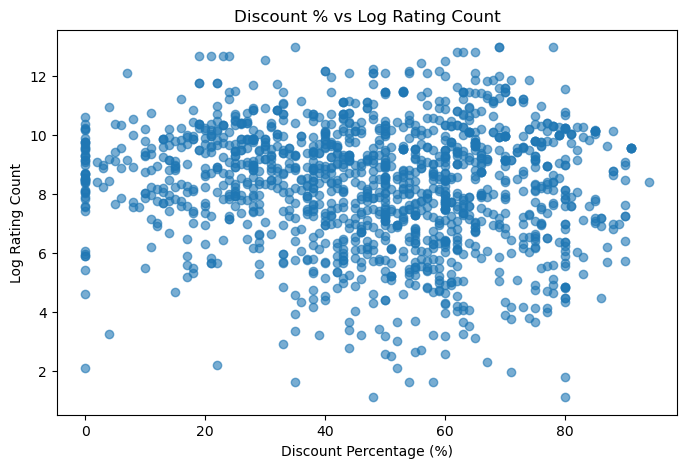

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(df["discount_percentage"], df["rating_count_log"], alpha=0.6)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Log Rating Count")
plt.title("Discount % vs Log Rating Count")
plt.show()


In [25]:
#Pearson correlation — linear relationship
pearson_corr = df[["discount_percentage", "rating"]].corr(method="pearson")
pearson_corr


,discount_percentage,rating
discount_percentage,1.000000,-0.155679
rating,-0.155679,1.000000


In [26]:
#Spearman correlation — rank-based (nonlinear / skewed data)
spearman_corr = df[["discount_percentage", "rating"]].corr(method="spearman")
spearman_corr


,discount_percentage,rating
discount_percentage,1.000000,-0.146194
rating,-0.146194,1.000000


In [27]:
# Independent variable (discount percentage)
X = df["discount_percentage"]

# Add constant (intercept term)
X = sm.add_constant(X)

# Dependent variable (rating)
y = df["rating"]

# Fit model
model = sm.OLS(y, X).fit()

# View full summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     36.26
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           2.18e-09
Time:                        10:36:54   Log-Likelihood:                -243.74
No. Observations:                1462   AIC:                             491.5
Df Residuals:                    1460   BIC:                             502.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.1961    

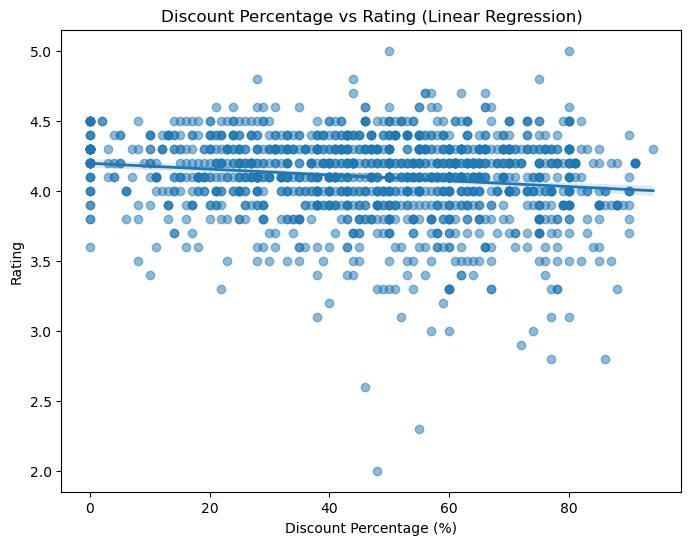

In [58]:
#SCATTER PLOT + REGRESSION LINE (LINEAR TREND)
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="discount_percentage", y="rating",
            scatter_kws={'alpha':0.5}, line_kws={'linewidth':2})
plt.title("Discount Percentage vs Rating (Linear Regression)")
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Rating")
plt.show()

C:\Users\appen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


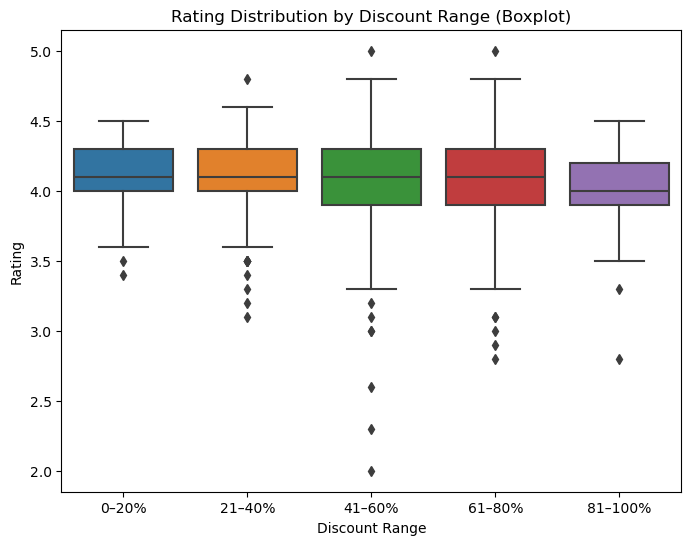

C:\Users\appen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


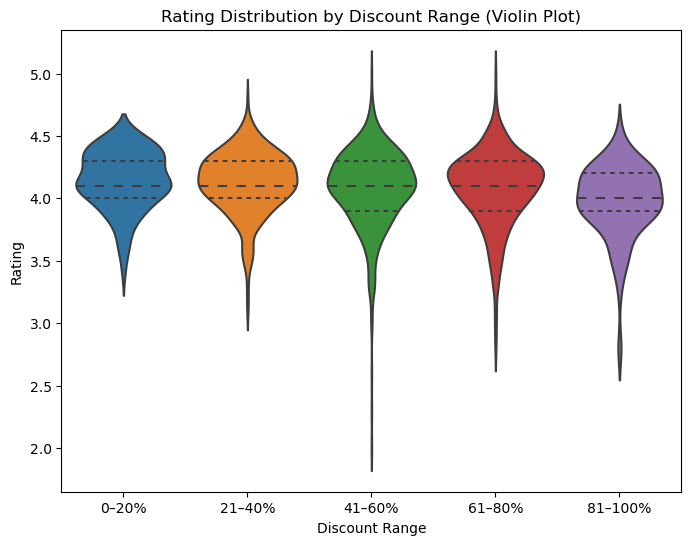

In [62]:
#BOXPLOT + VIOLIN PLOT BY DISCOUNT GROUPS
# Define bins for discount ranges
df["discount_group"] = pd.cut(df["discount_percentage"],
                              bins=[0, 20, 40, 60, 80, 100],
                              labels=["0–20%", "21–40%", "41–60%", "61–80%", "81–100%"])

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="discount_group", y="rating")
plt.title("Rating Distribution by Discount Range (Boxplot)")
plt.xlabel("Discount Range")
plt.ylabel("Rating")
plt.show()

# Violin plot
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="discount_group", y="rating", inner="quartile")
plt.title("Rating Distribution by Discount Range (Violin Plot)")
plt.xlabel("Discount Range")
plt.ylabel("Rating")
plt.show()

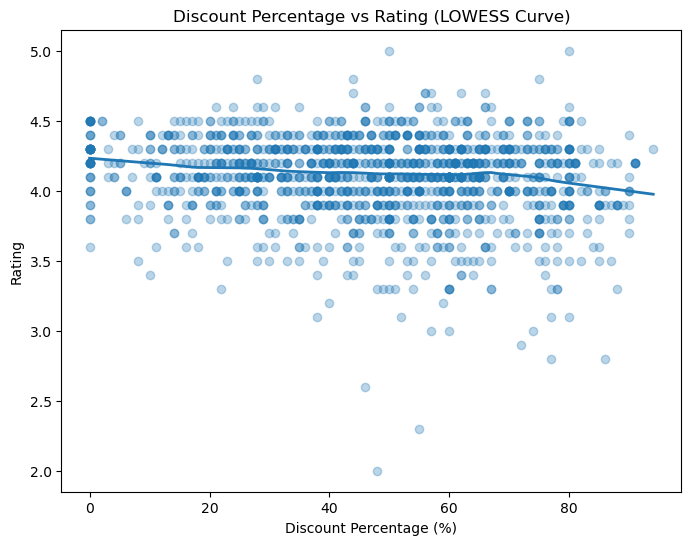

In [64]:
#LOWESS CURVE (NON-LINEAR TREND)
plt.figure(figsize=(8,6))
plt.scatter(df["discount_percentage"], df["rating"], alpha=0.3)
lowess_smoothed = lowess(df["rating"], df["discount_percentage"], frac=0.3)
plt.plot(lowess_smoothed[:,0], lowess_smoothed[:,1], linewidth=2)
plt.title("Discount Percentage vs Rating (LOWESS Curve)")
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Rating")
plt.show()

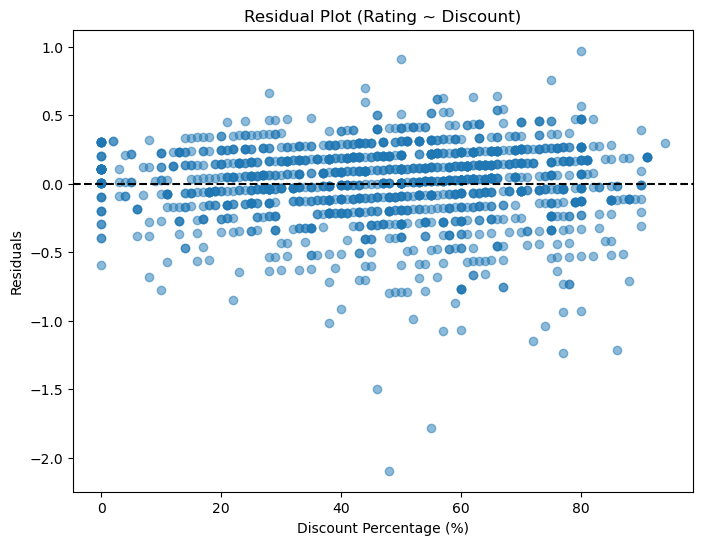

In [66]:
#RESIDUAL PLOT (CHECK NON-LINEARITY)
# Fit simple OLS model
X = sm.add_constant(df["discount_percentage"])
model = sm.OLS(df["rating"], X).fit()

# Residual plot
plt.figure(figsize=(8,6))
plt.scatter(df["discount_percentage"], model.resid, alpha=0.5)
plt.axhline(0, color="black", linestyle="--")
plt.title("Residual Plot (Rating ~ Discount)")
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Residuals")
plt.show()